# 2강

#### * 분류 : 미리 정의된, 가능성 있는 클래스 레이블 중 하나를 예측하는 것이다. 어떠한 조건, 내용에 따라 2가지의 결과로 예측한다.
#### *  회귀 : 연속적인 숫자를 예측하는 것, 부동소수점 수(실수)를 예측하는 것을 말한다.
    예) 한 사람의 교육 수준, 나이, 주거지 바탕으로 연간 소득 예측 => 예측된 값은 어떤 양으로 표현, 일정 범위 안의 숫자

[분류와 회귀의 차이점]
 => 출력 값의 연속성 유무
- 예) 연소득 예측 -> [회귀] 숫자의 구성으로 오차 범위 예측 가능
- 예) 웹사이트 언어 구분 -> [분류] 정확한 구분으로 중간 값 존재 불가

#### * 일반화 : 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면, 훈련 세트에서 테스트 세트로 일반화한다.
#### * 과대적합(Overfitting) : 모든 정보의 사용으로 복잡한 모델을 만드는 것
#### * 과소적합(Underfitting) : 너무 간단한 모델로 다양성을 잡아내지 못하는 것

[과대적합과 과소적합의 차이점] => 선택된 모델에 의해 복잡도가 높거나, 단순해진다.
- 동일한 양의 정보를 사용하더라도 어떤 모델을 선택하느냐에 따라서 복잡도가 높은 과대적합이 되거나 너무 단순해지는 과소 적합이 발생할 수 있다. 

# 　

### 데이터셋 : 데이터셋은 특성의 갯수로 결정된다.

- forge 데이터셋 : 이진 분류 데이터셋
- wave 데이터셋 : 회귀 알고리즘에 적용, 입력 특성 하나와 모델링할 타킷 변수 포함
- 특성이 적은 데이터셋(저차원 데이터셋) : 예) 위스콘신 유방함 데이터셋(cancer)
- 특성이 높은 데이터셋(고차원 데이터셋) : 예) 보스턴 주택가격 데이터셋 - 회귀 분석용, 보스턴 주변 주택 평균 가격 예측

###  *  K-최근접 이웃 알고리즘
- 가장 간단한 머신러닝 알고리즘
- 훈련 데이터셋을 저장하는 것이 과정의 전부이다.
- 새로운 데이터 포인트에 대해 예측할 경우, 훈련 데이터셋에서 가장 가까운 데이터 포인트 '최근접 이웃' 검색
- 이웃의 갯수에 따라 결정경계로 표현이 바뀌는 것이 확인되는데 이웃 수가 적을수록 복잡도는 높아지고, 이웃 수가 많은수록 복잡도는 낮아진다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


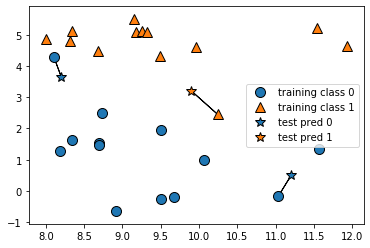

In [4]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


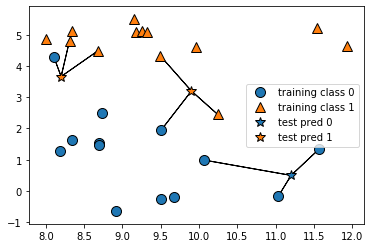

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
print("테스트 세트 예측 : ", clf.predict(X_test))

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [17]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))
# 테스트 세트 정확도 = 일반화의 정도
# 0.86 -> 정확도가 86%에 달한다.

테스트 세트 정확도 : 0.86


## 　

### 선형 모델 : 회귀의 선형 모델을 위한 일반화된 예측 함수이다.
- y = w[0] x x[0] + w[1] x x[1] + ... +[p] x x[p] + b
- x[0]부터 x[p]까지 데이터 포인트에 대한 특성
- 특성의 갯수 : p + 1
- w, b: 모델이 학습할 파라미터
- y : 모델이 만들어낸 예측값

#### * 선형 회귀(최소제곱법) : 가장 간단하고 오래된 회귀용 선형 알고리즘이며, 매개변수가 없어 복잡도 제어가 어렵다.
#### * 리지 회귀 : 모델의 단순화로 훈련 세트에 대한 성능 사이 절충 방법을 제공한다.
#### * 라소 : Ridge의 단점을 보완하는 대안 방식 특성을 기반하였다.

In [21]:
# intercept_속성 : 하나의 실수값
# coef_속성 : 입력 특성에 따라 하나씩 대응 Numpy 배열
# wave 데이터셋 : 하나의 입력 특성
# lr.coef_ : 하나의 원속

# => 훈련 데이터와 테스트 데이터 사이의 성능차이는 모델이 과대적합되었다는 신호로 복잡도를 제어할 수 있는 모델 필수 

In [33]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_ : ", lr.coef_) 
# 기울기 파라미터(w), 각 입력 특성에 대응되어지는 Numpy 배열

print("lr.intercept_ : ", lr.intercept_) 
# 절편 파라미터(b), 실수값 하나

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.03180434302675973


In [35]:
# 성능 확인
print("lr_train score : {:.2f}".format(lr.score(X_train, y_train)))
print("lr_test score : {:.2f}".format(lr.score(X_test, y_test)))
# 과소적합의 상태 -> 고차원의 데이터일 경우 과대적합 가능성이 높아진다.

lr_train score : 0.67
lr_test score : 0.66


In [36]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("lr_train score : {:.2f}".format(lr.score(X_train, y_train)))
print("lr_test score : {:.2f}".format(lr.score(X_test, y_test)))
# 과대적합의 상태
# 매개변수가 없는 것이 장점이나 복잡도 제어가 되지 않아서 과대적합될 가능성이 높다.

lr_train score : 0.95
lr_test score : 0.61


In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("train score1 : {:.2f}".format(ridge.score(X_train, y_train)))
print("test score1 : {:.2f}".format(ridge.score(X_test, y_test)))

train score1 : 0.89
test score1 : 0.75


#### 　

- alpha 매개변수

In [43]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("train score10 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("test score10 : {:.2f}".format(ridge10.score(X_test, y_test)))

train score10 : 0.79
test score10 : 0.64


In [48]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("train score10 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("test score10 : {:.2f}".format(ridge01.score(X_test, y_test)))

train score10 : 0.93
test score10 : 0.77


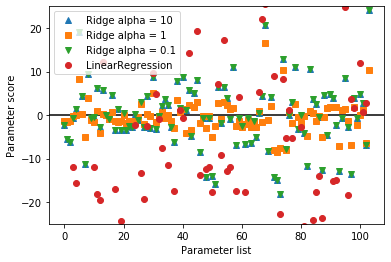

In [52]:
plt.plot(ridge10.coef_,'^', label="Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Parameter list")
plt.ylabel("Parameter score")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()